In [3]:
import pandas as pd

In [198]:
Ireland = pd.read_csv('Ireland.csv')
Ireland.head()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE
0,Passengers,2013M01,All main airports,All Countries,All directions,All flights,Thousand,1398.7
1,Passengers,2013M01,All main airports,All Countries,All directions,Scheduled,Thousand,1372.4
2,Passengers,2013M01,All main airports,All Countries,All directions,Unscheduled,Thousand,26.3
3,Passengers,2013M01,All main airports,All Countries,Arrival,All flights,Thousand,687.1
4,Passengers,2013M01,All main airports,All Countries,Arrival,Scheduled,Thousand,674.0


In [199]:
Finland = pd.read_csv('Finland.csv', encoding='latin-1')
Finland.head()

,Month,Reporting airport,Type of flight,Arrival/departure,Total Number of passengers,"Total Freight and mail total, tonne","Total Number of passengers, cumulative from the beginning of the year","Total Freight and mail, cumulative from the beginning of the year, tonnes",Helsinki-Vantaa Number of passengers,"Helsinki-Vantaa Freight and mail total, tonne","Helsinki-Vantaa Number of passengers, cumulative from the beginning of the year","Helsinki-Vantaa Freight and mail, cumulative from the beginning of the year, tonnes",Other domestic airports Number of passengers,"Other domestic airports Freight and mail total, tonne","Other domestic airports Number of passengers, cumulative from the beginning of the year","Other domestic airports Freight and mail, cumulative from the beginning of the year, tonnes",International Number of passengers,"International Freight and mail total, tonne","International Number of passengers, cumulative from the beginning of the year","International Freight and mail, cumulative from the beginning of the year, tonnes"
0,2019M01,Total,Total,Arrivals/departures total,1969169,16265,1969169,16265,276932,55,276932,55,279130,177,279130,177,1413107,16033,1413107,16033
1,2019M01,Total,Total,Arrivals,984340,7550,984340,7550,129975,41,129975,41,147386,13,147386,13,706979,7495,706979,7495
2,2019M01,Total,Total,Departures,984829,8715,984829,8715,146957,13,146957,13,131744,164,131744,164,706128,8538,706128,8538
3,2019M01,Total,Scheduled flight,Arrivals/departures total,1857115,14743,1857115,14743,276649,55,276649,55,278772,177,278772,177,1301694,14511,1301694,14511
4,2019M01,Total,Scheduled flight,Arrivals,931756,6733,931756,6733,129719,41,129719,41,147185,13,147185,13,654852,6678,654852,6678


In [200]:
unique_values = Ireland['Statistic Label'].unique()
print(unique_values)

['Passengers' 'Freight']


In [201]:
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783756 entries, 0 to 783755
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Statistic Label      783756 non-null  object 
 1   Month                783756 non-null  object 
 2   Airports in Ireland  783756 non-null  object 
 3   Country              783756 non-null  object 
 4   Direction            783756 non-null  object 
 5   Flight Type          783756 non-null  object 
 6   UNIT                 783756 non-null  object 
 7   VALUE                783756 non-null  float64
dtypes: float64(1), object(7)
memory usage: 47.8+ MB


In [202]:
# Create 'Passengers' and 'Freight' columns based on 'Statistic Label'
Ireland['Passengers'] = (Ireland['Statistic Label'] == 'Passengers') * Ireland['VALUE']
Ireland['Freight'] = (Ireland['Statistic Label'] == 'Freight') * Ireland['VALUE']

Ireland.tail()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE,Passengers,Freight
783751,Freight,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Scheduled,000 Tonnes,0.0,0.0,0.0
783752,Freight,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Unscheduled,000 Tonnes,0.0,0.0,0.0
783753,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,All flights,000 Tonnes,0.0,0.0,0.0
783754,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,Scheduled,000 Tonnes,0.0,0.0,0.0
783755,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,Unscheduled,000 Tonnes,0.0,0.0,0.0


In [203]:
columns_to_drop = ["Statistic Label",
    "Country", "Direction", "Flight Type", "UNIT", "VALUE", "Type of flight"]

# Ensure column names exist in the DataFrame before dropping
columns_to_drop = [col for col in columns_to_drop if col in Ireland.columns]

# Drop the specified columns
Ireland.drop(columns=columns_to_drop, axis=1, inplace=True)
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783756 entries, 0 to 783755
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Month                783756 non-null  object 
 1   Airports in Ireland  783756 non-null  object 
 2   Passengers           783756 non-null  float64
 3   Freight              783756 non-null  float64
dtypes: float64(2), object(2)
memory usage: 23.9+ MB


In [204]:
Ireland_gr=Ireland.groupby(['Month', 'Airports in Ireland']).agg({'Passengers': 'sum', 'Freight': 'sum'}).reset_index()

In [205]:
Ireland_gr= Ireland_gr[Ireland_gr['Airports in Ireland'] != 'All main airports']
Ireland_gr[['Passengers', 'Freight']] *= 1000
Ireland_gr.head()

,Month,Airports in Ireland,Passengers,Freight
1,2013M01,Cork,2461600.0,400.0
2,2013M01,Dublin,19657800.0,141900.0
3,2013M01,Kerry,256200.0,0.0
4,2013M01,Knock,634800.0,0.0
5,2013M01,Shannon,1073100.0,20000.0


In [206]:
import re
# Define the pattern to exclude
pattern_to_exclude = re.compile(r'^(201[3-8]|2019M(0[1-9]|1[0-2]))$')

# Use the pattern to filter rows
Ireland_gr_fil = Ireland_gr[~Ireland_gr['Month'].str.match(pattern_to_exclude)]

# Display the result
Ireland_gr_fil

,Month,Airports in Ireland,Passengers,Freight
1,2013M01,Cork,2461600.0,400.0
2,2013M01,Dublin,19657800.0,141900.0
3,2013M01,Kerry,256200.0,0.0
4,2013M01,Knock,634800.0,0.0
5,2013M01,Shannon,1073100.0,20000.0
...,...,...,...,...
733,2023M03,Cork,3334400.0,0.0
734,2023M03,Dublin,40635100.0,179300.0
735,2023M03,Kerry,459800.0,0.0
736,2023M03,Knock,1004000.0,0.0


In [207]:
columns_to_drop = ["Type of flight",
    "Arrival/departure", "Total Number of passengers, cumulative from the beginning of the year",
    "Total Freight and mail, cumulative from the beginning of the year, tonnes",
    "Helsinki-Vantaa Number of passengers", "Helsinki-Vantaa Freight and mail total, tonne",
    "Helsinki-Vantaa Number of passengers, cumulative from the beginning of the year",
    "Helsinki-Vantaa Freight and mail, cumulative from the beginning of the year, tonnes",
    "Other domestic airports Number of passengers",
    "Other domestic airports Freight and mail total, tonne",
    "Other domestic airports Number of passengers, cumulative from the beginning of the year",
    "Other domestic airports Number of passengers, cumulative from the beginning of the year",
    "Other domestic airports Freight and mail, cumulative from the beginning of the year, tonnes",
    "International Number of passengers",
    "International Freight and mail total, tonne",
    "International Number of passengers, cumulative from the beginning of the year",
    "International Freight and mail, cumulative from the beginning of the year, tonnes"
]

# Ensure column names exist in the DataFrame before dropping
columns_to_drop = [col for col in columns_to_drop if col in Finland.columns]

# Drop the specified columns
Finland.drop(columns=columns_to_drop, axis=1, inplace=True)
Finland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151 entries, 0 to 11150
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Month                                11151 non-null  object
 1   Reporting airport                    11151 non-null  object
 2   Total Number of passengers           11151 non-null  int64 
 3   Total Freight and mail total, tonne  11151 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 348.6+ KB


In [208]:
Finland = Finland[Finland['Reporting airport'] != 'Total']
Finland

,Month,Reporting airport,Total Number of passengers,"Total Freight and mail total, tonne"
9,2019M01,Helsinki-Vantaa,1574950,15841
10,2019M01,Helsinki-Vantaa,798402,7322
11,2019M01,Helsinki-Vantaa,776548,8518
12,2019M01,Helsinki-Vantaa,1525370,14328
13,2019M01,Helsinki-Vantaa,774769,6509
...,...,...,...,...
11146,2023M11,Vaasa,5721,0
11147,2023M11,Vaasa,5784,0
11148,2023M11,Vaasa,2735,0
11149,2023M11,Vaasa,1358,0


In [209]:
Finland.rename(columns={"Reporting airport": "Airports in Finland", "Total Number of passengers":"Passengers Finland","Total Freight and mail total, tonne":"Freight Finland" }, inplace=True)

In [210]:
Finland_gr=Finland.groupby(['Month', 'Airports in Finland']).agg({'Passengers Finland': 'sum', 'Freight Finland': 'sum'}).reset_index()

In [211]:
Finland_gr.head()

,Month,Airports in Finland,Passengers Finland,Freight Finland
0,2019M01,Enontekiö,7076,0
1,2019M01,Helsinki-Vantaa,6299800,63361
2,2019M01,Ivalo,136644,0
3,2019M01,Joensuu,35368,8
4,2019M01,Jyväskylä,17200,4


In [253]:
#Drop totals from the dataset
# Define the pattern to exclude
pattern_to_exclude = re.compile(r'^2023M(0[4-9]|1[0-1])$')

# Use the pattern to filter rows
Finland_gr_fil = Finland_gr[~Finland_gr['Month'].str.match(pattern_to_exclude)]

# Display the result
Finland_gr_fil

,Month,Airports in Finland,Passengers Finland,Freight Finland
0,2019M01,Enontekiö,7076,0
1,2019M01,Helsinki-Vantaa,6299800,63361
2,2019M01,Ivalo,136644,0
3,2019M01,Joensuu,35368,8
4,2019M01,Jyväskylä,17200,4
...,...,...,...,...
1015,2023M03,Rovaniemi,326800,24
1016,2023M03,Savonlinna,624,0
1017,2023M03,Tampere-Pirkkala,60796,56
1018,2023M03,Turku,76452,1576


In [254]:
Finland_gr_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1019
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                1020 non-null   object
 1   Airports in Finland  1020 non-null   object
 2   Passengers Finland   1020 non-null   int64 
 3   Freight Finland      1020 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 39.8+ KB


In [255]:
unique_airports = Finland_gr_fil['Airports in Finland'].unique()
print(unique_airports)

['Enontekiö' 'Helsinki-Vantaa' 'Ivalo' 'Joensuu' 'Jyväskylä' 'Kajaani'
 'Kemi-Tornio' 'Kittilä' 'Kokkola-Pietarsaari' 'Kuopio' 'Kuusamo'
 'Lappeenranta' 'Mariehamn' 'Oulu' 'Pori' 'Rovaniemi' 'Savonlinna'
 'Tampere-Pirkkala' 'Turku' 'Vaasa']


In [256]:
import plotly.graph_objects as go
import plotly.express as px
 

In [257]:
Finland_gr_fil. tail()

,Month,Airports in Finland,Passengers Finland,Freight Finland
1015,2023M03,Rovaniemi,326800,24
1016,2023M03,Savonlinna,624,0
1017,2023M03,Tampere-Pirkkala,60796,56
1018,2023M03,Turku,76452,1576
1019,2023M03,Vaasa,47532,0


In [259]:
# Given lists of airport names, latitude, and longitude
airport_names = ['Helsinki-Vantaa', 'Ivalo', 'Joensuu', 'Jyväskylä', 'Kajaani', 'Kemi-Tornio', 'Kittilä', 'Kokkola-Pietarsaari', 'Kuopio', 'Kuusamo', 'Lappeenranta', 'Mariehamn', 'Oulu', 'Pori', 'Rovaniemi', 'Savonlinna', 'Tampere-Pirkkala', 'Turku', 'Vaasa']
latitude_list = [60.3172, 68.6075, 62.6604, 62.3997, 64.2859, 65.7805, 67.7006, 63.7218, 63.0071, 65.9876, 61.0447, 60.1226, 64.9304, 61.4616, 66.4970, 61.9421, 61.4180, 60.5149, 63.0960]
longitude_list = [24.9633, 27.4058, 29.6195, 25.6777, 27.7226, 24.5657, 24.8441, 23.1556, 27.7536, 29.2390, 28.1447, 19.9440, 25.4395, 21.7910, 25.7241, 28.9163, 23.6178, 22.2617, 21.6158]

# Create a new DataFrame
airport_df = pd.DataFrame({
    'Airport Name': airport_names,
    'Latitude': latitude_list,
    'Longitude': longitude_list
})

# Print the new DataFrame
print(airport_df)

           Airport Name  Latitude  Longitude
0       Helsinki-Vantaa   60.3172    24.9633
1                 Ivalo   68.6075    27.4058
2               Joensuu   62.6604    29.6195
3             Jyväskylä   62.3997    25.6777
4               Kajaani   64.2859    27.7226
5           Kemi-Tornio   65.7805    24.5657
6               Kittilä   67.7006    24.8441
7   Kokkola-Pietarsaari   63.7218    23.1556
8                Kuopio   63.0071    27.7536
9               Kuusamo   65.9876    29.2390
10         Lappeenranta   61.0447    28.1447
11            Mariehamn   60.1226    19.9440
12                 Oulu   64.9304    25.4395
13                 Pori   61.4616    21.7910
14            Rovaniemi   66.4970    25.7241
15           Savonlinna   61.9421    28.9163
16     Tampere-Pirkkala   61.4180    23.6178
17                Turku   60.5149    22.2617
18                Vaasa   63.0960    21.6158


In [260]:
# Merge on 'Airport Name' and 'Airports in Finland'
merged_df = pd.merge(Finland_gr_fil, airport_df[['Airport Name', 'Longitude', 'Latitude']], left_on='Airports in Finland', right_on='Airport Name', how='left')

# Drop the duplicate 'Airport Name' column
merged_df = merged_df.drop(columns='Airport Name')

# Rename the columns for clarity
merged_df = merged_df.rename(columns={'Longitude': 'Airport Longitude', 'Latitude': 'Airport Latitude'})

# Print the merged DataFrame
print(merged_df)

        Month Airports in Finland  Passengers Finland  Freight Finland  \
0     2019M01           Enontekiö                7076                0   
1     2019M01     Helsinki-Vantaa             6299800            63361   
2     2019M01               Ivalo              136644                0   
3     2019M01             Joensuu               35368                8   
4     2019M01           Jyväskylä               17200                4   
...       ...                 ...                 ...              ...   
1015  2023M03           Rovaniemi              326800               24   
1016  2023M03          Savonlinna                 624                0   
1017  2023M03    Tampere-Pirkkala               60796               56   
1018  2023M03               Turku               76452             1576   
1019  2023M03               Vaasa               47532                0   

      Airport Longitude  Airport Latitude  
0                   NaN               NaN  
1               24.9633

In [268]:
fig = px.scatter_geo(
    merged_df,
    lon='Airport Longitude',
    lat='Airport Latitude',
    size='Passengers Finland',
    size_max=40,
    text='Airports in Finland',  # Add airport names as text labels
    projection='natural earth',
    title='Passenger Counts at Airports in Northern Europe',
    labels={'Passengers Finland': 'Passenger Count'},
    template='plotly',
    color_discrete_sequence=['blue']
)

fig.update_geos(
    resolution=50,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    scope='europe',  # Set the geographic scope to Europe
    center=dict(lon=24, lat=60),  # Center the map on Northern Europe
)

fig.update_traces(
    textfont=dict(size=8),  # Set the font size for airport names
)

fig.show()

In [40]:
#Create two dataset for Finland, grouping Passengers and Freight in the capital and province

# Create passenger and freight  dataset for Finland  capital
# Filter on "Helsinki-Vantaa" airport
df_Helsinki_Pass = Finland_gr_fil[Finland_gr_fil['Airports in Finland'] == 'Helsinki-Vantaa']

# Group by Month and sum the values in Passengers Finland
df_Helsinki_Pass = df_Helsinki_Pass.groupby('Month')['Passengers Finland'].sum().reset_index()

# Print
df_Helsinki_Pass.head()

,Month,Passengers Finland
0,2019M01,6299800
1,2019M02,6158928
2,2019M03,7031408
3,2019M04,7231532
4,2019M05,7782008


In [41]:

# Create  freight  dataset for Finland  capital
# Filter on "Helsinki-Vantaa" airport
df_Helsinki_Freight = Finland_gr_fil[Finland_gr_fil['Airports in Finland'] == 'Helsinki-Vantaa']

# Group by Month and sum the values in Passengers Finland
df_Helsinki_Freight = df_Helsinki_Freight.groupby('Month')['Freight Finland'].sum().reset_index()

# Print 
df_Helsinki_Freight.head()

,Month,Freight Finland
0,2019M01,63361
1,2019M02,58079
2,2019M03,72316
3,2019M04,72131
4,2019M05,78331


In [42]:
#Combine freight and passengers dataset for Helsinki
merged_data_Helsinki = pd.merge(df_Helsinki_Freight, df_Helsinki_Pass, on=["Month"], how="right")
# Rename 'Freight Finland' to Freight Helsinki
merged_data_Helsinki.rename(columns={'Freight Finland': 'Freight Helsinki'}, inplace=True)
# Rename 'Passengers Finland' to Passenger Helsinki
merged_data_Helsinki.rename(columns={'Passengers Finland': 'Passengers Helsinki'}, inplace=True)
#  Reset the index and drop the default index column
merged_data_Helsinki = merged_data_Helsinki.reset_index(drop=True)


In [43]:
merged_data_Helsinki.head()

,Month,Freight Helsinki,Passengers Helsinki
0,2019M01,63361,6299800
1,2019M02,58079,6158928
2,2019M03,72316,7031408
3,2019M04,72131,7231532
4,2019M05,78331,7782008


In [44]:
#Create two dataset for Ireland, grouping Passengers and Freight in the capital and province

# Create passenger and freight  dataset for Finland  capital
# Filter on "Helsinki-Vantaa" airport
df_Dublin_Pass = Ireland_gr_fil[Ireland_gr_fil['Airports in Ireland'] == 'Dublin']

# Group by Month and sum the values in Passengers Finland
df_Dublin_Pass = df_Dublin_Pass.groupby('Month')['Passengers'].sum().reset_index()

# Print
df_Dublin_Pass.head()

,Month,Passengers
0,2013M01,19657800.0
1,2013M02,20100200.0
2,2013M03,26334900.0
3,2013M04,27151000.0
4,2013M05,30912800.0


In [45]:
# Create  freight  dataset for Ireland's capital
# Filter on "Dublin" airport
df_Dublin_Freight = Ireland_gr_fil[Ireland_gr_fil['Airports in Ireland'] == 'Dublin']

# Group by Month and sum the values in Passengers Finland
df_Dublin_Freight = df_Dublin_Freight.groupby('Month')['Freight'].sum().reset_index()

# Print 
df_Dublin_Freight.head()

,Month,Freight
0,2013M01,141900.0
1,2013M02,134300.0
2,2013M03,142400.0
3,2013M04,134200.0
4,2013M05,141600.0


In [46]:
#Combine freight and passengers dataset for Dublin
merged_data_Dublin = pd.merge(df_Dublin_Freight, df_Dublin_Pass, on=["Month"], how="inner")
# Rename 'Freight Finland' to Freight Helsinki
merged_data_Dublin.rename(columns={'Freight': 'Freight Dublin'}, inplace=True)
# Rename 'Passengers Finland' to Passenger Helsinki
merged_data_Dublin.rename(columns={'Passengers': 'Passengers Dublin'}, inplace=True)
#  Reset the index and drop the default index column
merged_data_Dublin = merged_data_Dublin.reset_index(drop=True)
merged_data_Dublin.head()

,Month,Freight Dublin,Passengers Dublin
0,2013M01,141900.0,19657800.0
1,2013M02,134300.0,20100200.0
2,2013M03,142400.0,26334900.0
3,2013M04,134200.0,27151000.0
4,2013M05,141600.0,30912800.0


In [47]:
# Merge data for Finland and Ireland capital
merged_data_Capital=pd.merge(merged_data_Dublin,merged_data_Helsinki,on=["Month"], how="inner") 
merged_data_Capital.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki
0,2020M01,169200.0,34921200.0,66509,6467108
1,2020M02,161800.0,34365900.0,59276,6026528
2,2020M03,164000.0,17109000.0,54947,3002136
3,2020M04,119200.0,395700.0,30088,85752
4,2020M05,149000.0,713900.0,40652,146748


In [48]:
# Read the 'CS.csv' dataset and keep only specified columns
Consumer = pd.read_csv('CS.csv', usecols=['Country', 'Time', 'Value'])

# Display the DataFrame
print(Consumer)

    Country      Time     Value
0   Ireland  Jan-2020  0.182677
1   Ireland  Feb-2020  0.202604
2   Ireland  Mar-2020 -0.283073
3   Ireland  Apr-2020 -1.710016
4   Ireland  May-2020  0.378210
..      ...       ...       ...
79  Finland  Jul-2023 -0.016982
80  Finland  Aug-2023  0.118892
81  Finland  Sep-2023 -0.610718
82  Finland  Oct-2023 -0.102412
83  Finland  Nov-2023  0.051258

[84 rows x 3 columns]


In [49]:

# Convert 'Time' column to datetime
Consumer['Time'] = pd.to_datetime(Consumer['Time'], format='%b-%Y')

# Format 'Time' column as "2020M01" and convert to object
Consumer['Time'] = Consumer['Time'].dt.strftime('%YM%m').astype(str)

# Display the updated DataFrame
print(Consumer)

    Country     Time     Value
0   Ireland  2020M01  0.182677
1   Ireland  2020M02  0.202604
2   Ireland  2020M03 -0.283073
3   Ireland  2020M04 -1.710016
4   Ireland  2020M05  0.378210
..      ...      ...       ...
79  Finland  2023M07 -0.016982
80  Finland  2023M08  0.118892
81  Finland  2023M09 -0.610718
82  Finland  2023M10 -0.102412
83  Finland  2023M11  0.051258

[84 rows x 3 columns]


In [50]:
print(Consumer.dtypes)

Country     object
Time        object
Value      float64
dtype: object


In [51]:
 #Merge the two DataFrames based on 'Time' and "Month"columns with inner join
merged_data_CapitalCS = pd.merge(merged_data_Capital, Consumer, left_on='Month', right_on='Time', how='inner')
# Create new columns 'Ireland Index' and 'Finland Index' based on the 'Country' variable
merged_data_CapitalCS['Ireland Index'] = merged_data_CapitalCS.apply(lambda row: row['Value'] if row['Country'] == 'Ireland' else None, axis=1)
merged_data_CapitalCS['Finland Index'] = merged_data_CapitalCS.apply(lambda row: row['Value'] if row['Country'] == 'Finland' else None, axis=1)

# Group by 'Month' and aggregate the values
merged_data_CapitalCS = merged_data_CapitalCS.groupby('Month').agg({
    'Freight Dublin': 'sum',
    'Passengers Dublin': 'sum',
    'Freight Helsinki': 'sum',
    'Passengers Helsinki': 'sum',
    'Ireland Index': 'first',  # Assuming 'Ireland Index' is the same for both Finland and Ireland
    'Finland Index': 'first'   # Assuming 'Finland Index' is the same for both Finland and Ireland
}).reset_index()

# Display the updated DataFrame
merged_data_CapitalCS.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
0,2020M01,338400.0,69842400.0,133018,12934216,0.182677,0.050559
1,2020M02,323600.0,68731800.0,118552,12053056,0.202604,-0.117911
2,2020M03,328000.0,34218000.0,109894,6004272,-0.283073,-0.387878
3,2020M04,238400.0,791400.0,60176,171504,-1.710016,-1.100445
4,2020M05,298000.0,1427800.0,81304,293496,0.378210,0.873033


In [58]:
merged_data_CapitalCS.describe()

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
count,39.000000,3.900000e+01,39.000000,3.900000e+01,37.000000,39.000000
mean,321864.102564,3.866760e+07,106064.410256,5.061796e+06,-0.030550,-0.029112
std,47725.191887,3.064167e+07,24229.047964,3.928291e+06,0.428248,0.518421
min,151200.000000,7.914000e+05,50781.000000,1.715040e+05,-1.710016,-1.674004
25%,309600.000000,8.737800e+06,92699.000000,1.182992e+06,-0.262287,-0.303208
50%,328000.000000,3.885900e+07,109160.000000,4.889872e+06,0.000000,0.033514
75%,345600.000000,6.792650e+07,117029.000000,8.733660e+06,0.228861,0.217170
max,384000.000000,9.239580e+07,154614.000000,1.293422e+07,0.592676,1.093043


In [52]:
# Select the columns for comparison
columns_to_compare = [ 'Freight Dublin', 'Freight Helsinki']

# Melt the DataFrame to long format for easy plotting
melted_df = pd.melt(merged_data_CapitalCS, id_vars=['Month'], value_vars=columns_to_compare, var_name='Variable', value_name='Value')

# Create side-by-side bar charts using plotly express
fig = px.bar(melted_df, x='Month', y='Value', color='Variable',
             title='Freight Dublin vs Helsinki',
             labels={'Value': 'Freight'},
             barmode='group')

# Show the figure
fig.show()

In [53]:


# Select the columns for comparison
columns_to_compare = ['Passengers Dublin',  'Passengers Helsinki']

# Melt the DataFrame to long format for easy plotting
melted_df1 = pd.melt(merged_data_CapitalCS, id_vars=['Month'], value_vars=columns_to_compare, var_name='Variable', value_name='Value')

# Create a dropdown menu for variable selection
variable_dropdown = [dict(label=col, method='update', args=[{'visible': melted_df1['Variable'] == col}, {'title.text': f'Comparison of {col}'}]) for col in melted_df1['Variable'].unique()]

# Create side-by-side bar charts with multiple y-axes
fig = px.bar(melted_df1, x='Month', y='Value', color='Variable', facet_col='Variable',
             labels={'Value': 'Passengers'},
             title='Passengers Dublin vs Helsinki',
             height=400, width=1000)



# Show the figure
fig.show()

In [54]:
import numpy as np
import plotly.express as px

In [55]:
xmin, xmax = min(merged_data_Capital['Freight Dublin']), max(merged_data_Capital['Freight Dublin'])

In [56]:
ymin, ymax = min(merged_data_Capital["Freight Helsinki"]), max(merged_data_Capital["Freight Helsinki"]) 

In [169]:

fig = px.scatter(
    merged_data_CapitalCS,
    x="Freight Dublin",
    y="Passengers Dublin",
    animation_frame="Month",
    hover_name="Month",
    color="Ireland Index",
    size="Ireland Index",
    title="Interactive Graph Ireland",
    labels={"Freight Dublin": "Freight Dublin", "Passengers Dublin": "Passengers Dublin"},
    range_x=[merged_data_CapitalCS["Freight Dublin"].min(), merged_data_CapitalCS["Freight Dublin"].max()],
    range_y=[merged_data_CapitalCS["Passengers Dublin"].min(), merged_data_CapitalCS["Passengers Dublin"].max()],
    color_continuous_scale="Plasma",
)

# Adjust animation speed
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])])

# Show the figure
fig.show()

In [170]:
fig = px.scatter(
    merged_data_CapitalCS,
    x="Freight Helsinki",
    y="Passengers Helsinki",
    animation_frame="Month",
    hover_name="Month",
    color="Finland Index",
    size="Finland Index",
    title="Interactive Graph Finland",
    labels={"Freight Helsinki": "Freight Helsinki", "Passengers Helsinki": "Passengers Helsinki"},
    range_x=[merged_data_CapitalCS["Freight Helsinki"].min(), merged_data_CapitalCS["Freight Helsinki"].max()],
    range_y=[merged_data_CapitalCS["Passengers Helsinki"].min(), merged_data_CapitalCS["Passengers Helsinki"].max()],
    color_continuous_scale="Plasma",
)

# Adjust animation speed
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])])

# Show the figure
fig.show()

Statistics

Confidence intervals

In [60]:
import numpy as np
import scipy.stats as st
#what is average of Dublin passengers. 90% confidence
X=merged_data_CapitalCS.iloc[:,2:3].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([30395308.67320818]), array([46939896.45499695]))

In [61]:
#what is average of Dublin Freight. 90% confidence
X=merged_data_CapitalCS.iloc[:,1:2].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([308979.79098804]), array([334748.41414017]))

In [62]:
#what is average of Helsinki passengers. 90% confidence
X=merged_data_CapitalCS.iloc[:,4:5].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([4001280.43551497]), array([6122312.17986965]))

In [63]:
#what is average of Helsinki Freight. 90% confidence
X=merged_data_CapitalCS.iloc[:,3:4].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([99523.32386534]), array([112605.49664748]))

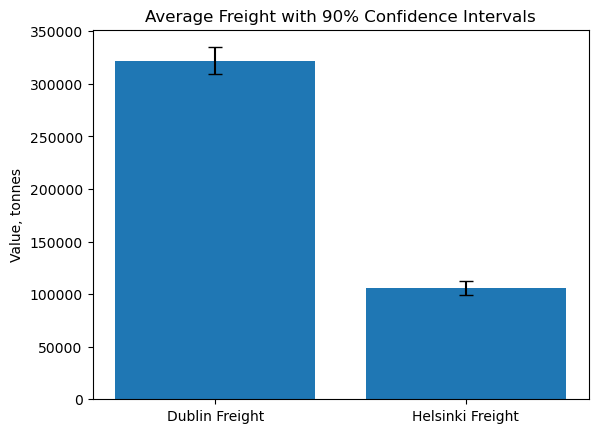

In [99]:
# Define data for Dublin Freight
X_dublin_freight = merged_data_CapitalCS['Freight Dublin'].values
conf_interval_dublin_freight = st.t.interval(confidence=0.90, df=len(X_dublin_freight)-1, loc=np.mean(X_dublin_freight), scale=st.sem(X_dublin_freight))

# Define data for Helsinki Freight
X_helsinki_freight = merged_data_CapitalCS['Freight Helsinki'].values
conf_interval_helsinki_freight = st.t.interval(confidence=0.90, df=len(X_helsinki_freight)-1, loc=np.mean(X_helsinki_freight), scale=st.sem(X_helsinki_freight))

# Plot bar chart with error bars
fig, ax = plt.subplots()

ax.bar(x=['Dublin Freight', 'Helsinki Freight'],
       height=[np.mean(X_dublin_freight), np.mean(X_helsinki_freight)],
       yerr=[[conf_interval_dublin_freight[1] - np.mean(X_dublin_freight),
              conf_interval_helsinki_freight[1] - np.mean(X_helsinki_freight)]],
       capsize=5)

ax.set_title('Average Freight with 90% Confidence Intervals')
ax.set_ylabel('Value, tonnes')
plt.show()

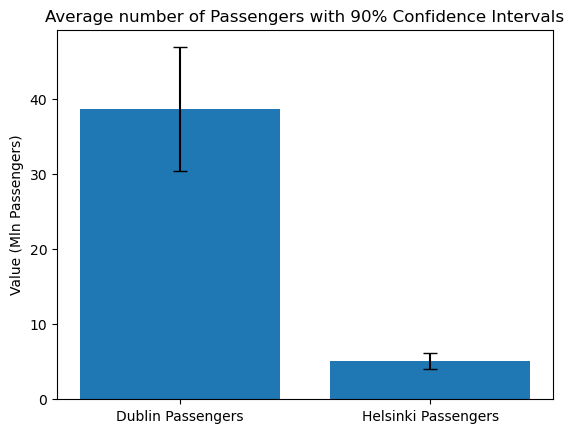

In [102]:
# Define data for Dublin Freight
X_helsinki_passengers = merged_data_CapitalCS['Passengers Helsinki'].values
conf_interval_helsinki_passengers = st.t.interval(confidence=0.90, df=len(X_helsinki_passengers)-1, loc=np.mean(X_helsinki_passengers), scale=st.sem(X_helsinki_passengers))

# Convert values to millions
X_dublin_passengers_in_millions = X_dublin_passengers / 1000000
X_helsinki_passengers_in_millions = X_helsinki_passengers / 1000000

# Convert confidence intervals to millions
conf_interval_dublin_passengers_in_millions = np.array(conf_interval_dublin_passengers) / 1000000
conf_interval_helsinki_passengers_in_millions = np.array(conf_interval_helsinki_passengers) / 1000000

# Plot bar chart with error bars
fig, ax = plt.subplots()

ax.bar(x=['Dublin Passengers', 'Helsinki Passengers'],
       height=[np.mean(X_dublin_passengers_in_millions), np.mean(X_helsinki_passengers_in_millions)],
       yerr=[[conf_interval_dublin_passengers_in_millions[1] - np.mean(X_dublin_passengers_in_millions),
              conf_interval_helsinki_passengers_in_millions[1] - np.mean(X_helsinki_passengers_in_millions)]],
       capsize=5)

ax.set_title('Average number of Passengers with 90% Confidence Intervals')
ax.set_ylabel('Value (Mln Passengers)')
plt.show()

Paramentric T-test, Shapiro normality test, Levene's test

In [103]:
from scipy.stats import ttest_ind

# Compare Passengers Dublin and Passengers Helsinki using t-test
data_dublin = merged_data_CapitalCS['Passengers Dublin']
data_helsinki = merged_data_CapitalCS['Passengers Helsinki']

# Check assumptions
# 1. Normality (Shapiro test)
_, p_dublin = st.shapiro(data_dublin)
_, p_helsinki = st.shapiro(data_helsinki)

# 2. Homogeneity of variances (Levene's test)
_, p_var = st.levene(data_dublin, data_helsinki)

# Perform t-test if assumptions are met
if p_dublin > 0.05 and p_helsinki > 0.05 and p_var > 0.05:
    t_stat, p_value = ttest_ind(data_dublin, data_helsinki)
    print(f"T-Test: t_stat = {t_stat}, p_value = {p_value}")
else:
    print("Parametric assumptions not met. Consider non-parametric tests.")

Parametric assumptions not met. Consider non-parametric tests.


Mannwhitneyu non paramentric test

In [108]:
from scipy.stats import mannwhitneyu
# Non Parametric test for Passengers:  Mann-Whitney U test for Passengers Dublin and Passengers Helsinki
u_stat, p_value_mannwhitney = mannwhitneyu(data_dublin, data_helsinki)
print(f"Mann-Whitney U Test: U_stat = {u_stat}, p_value = {p_value_mannwhitney}")

Mann-Whitney U Test: U_stat = 1518.0, p_value = 3.8703936962412065e-14


As p value less than 0.05 we reject H0.  At 5% significance level there is no evidance to say that the Passenger numbers in Dublin and Helsinki are equal

Chi-squared test

In [114]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Freight Helsinki'], merged_data_CapitalCS['Finland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1482.000000000001
P-value: 0.23780643207803892


p-value ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.

p-value 0.23780643207803892 indicates  P value is greater than 0.05 and we accept H0.  This indicates that Freight Helsinki is assoicated with Finland  Consumer Index

In [116]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Passengers Helsinki'], merged_data_CapitalCS['Finland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1482.0000000000007
P-value: 0.23780643207804017


p-value 0.23780643207804017 indicates  P value is greater than0.05 and we accept H0.  This indicates that Passengers Helsinki is assoicated with Finland  Consumer Index

In [117]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Passengers Dublin'], merged_data_CapitalCS['Ireland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1331.9999999999998
P-value: 0.2376975125175564


p-value 0.2376975125175564 indicates  P value is greater than0.05 and we accept H0.  This indicates that Passengers Dublin is assoicated with Ireland Consumer Index

In [118]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Freight Dublin'], merged_data_CapitalCS['Ireland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1110.0
P-value: 0.2565792513077524


p-value 0.2565792513077524 indicates  P value is greater than 0.05 and we accept H0.  This indicates that Freight Dublin is assoicated with Ireland Consumer Index

 Wilcoxon signed-rank test

In [122]:
from scipy.stats import wilcoxon
data = merged_data_CapitalCS[['Freight Dublin', 'Freight Helsinki']].dropna()

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data['Freight Dublin'], data['Freight Helsinki'], zero_method='zsplit')

# Display the results
print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two variables.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.")

Wilcoxon Signed-Rank Test:
Statistic: 0.0
P-value: 3.637978807091713e-12
Reject the null hypothesis. There is a significant difference between the two variables.


In [126]:
data = merged_data_CapitalCS[['Ireland Index', 'Finland Index']].dropna()

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data['Ireland Index'], data['Finland Index'], zero_method='zsplit')

# Display the results
print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two variables.")
else:
    print("Fail to reject the null hypothesis, accept H0. There is not enough evidence to suggest a significant difference between Consumer indecies in Finland and Ireland.")

Wilcoxon Signed-Rank Test:
Statistic: 309.0
P-value: 0.530683740216773
Fail to reject the null hypothesis, accept H0. There is not enough evidence to suggest a significant difference between Consumer indecies in Finland and Ireland.


Machine Learning

In [151]:
#Generate Synthetic data,contaninf 1000 records

original_data = pd.DataFrame({
    'Month':merged_data_CapitalCS['Month'],
    'Freight Dublin': merged_data_CapitalCS['Freight Dublin'],
    'Passengers Dublin': merged_data_CapitalCS['Passengers Dublin'],
    'Freight Helsinki': merged_data_CapitalCS['Freight Helsinki'],
    'Passengers Helsinki': merged_data_CapitalCS['Passengers Helsinki'],
    'Ireland Index': merged_data_CapitalCS['Ireland Index'],
    'Finland Index': merged_data_CapitalCS['Finland Index']
})
# Function to generate synthetic data using bootstrapping
def generate_synthetic_data(original_data, num_samples=1000):
    synthetic_data = pd.DataFrame()

    for column in original_data.columns:
        # Use bootstrapping to generate synthetic data for each column
        synthetic_column = np.random.choice(original_data[column], size=num_samples, replace=True)
        synthetic_data[column] = synthetic_column

    return synthetic_data

# Generate synthetic data with 1000 samples
synthetic_data = generate_synthetic_data(original_data, num_samples=1000)

# Ensure the synthetic dataset has the same structure as the original data
synthetic_data.columns = original_data.columns

# Validate synthetic data
print("Original Data:")
print(original_data.head())

print("\nSynthetic Data:")
print(synthetic_data.tail())


Original Data:
     Month  Freight Dublin  Passengers Dublin  Freight Helsinki  \
0  2020M01        0.221122           0.494358          0.303305   
1  2020M02        0.746347           0.520197          0.705900   
2  2020M03        0.745826           0.355145          0.588580   
3  2020M04        0.669241           0.460869          0.787377   
4  2020M05        0.434481           0.427679          0.494752   

   Passengers Helsinki  Ireland Index  Finland Index  
0             0.549873       0.555228       0.564111  
1             0.622183       0.349877       0.373554  
2             0.465927       0.331406       0.342000  
3             0.515457       0.138429       0.253844  
4             0.591294       0.432274       0.511385  

Synthetic Data:
       Month  Freight Dublin  Passengers Dublin  Freight Helsinki  \
995  2020M02        0.613058           0.427679          0.684977   
996  2020M06        0.684096           0.461314          0.705900   
997  2020M04        0.629270

In [149]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                1000 non-null   object 
 1   Freight Dublin       1000 non-null   float64
 2   Passengers Dublin    1000 non-null   float64
 3   Freight Helsinki     1000 non-null   float64
 4   Passengers Helsinki  1000 non-null   float64
 5   Ireland Index        1000 non-null   float64
 6   Finland Index        1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [269]:
#to ensure that synthetic_data maintain the same  statistical properties and relationships as merged_data_CapitalCS
print(merged_data_CapitalCS.describe())
print(synthetic_data.describe())

       Freight Dublin  Passengers Dublin  Freight Helsinki  \
count       39.000000          39.000000         39.000000   
mean         0.526745           0.491933          0.544473   
std          0.179357           0.142282          0.138526   
min          0.221122           0.177584          0.303305   
25%          0.378804           0.399105          0.452707   
50%          0.545082           0.465835          0.540236   
75%          0.666655           0.590104          0.665539   
max          0.825388           0.802019          0.787377   

       Passengers Helsinki  Ireland Index  Finland Index  
count            39.000000      39.000000      39.000000  
mean              0.523092       0.447634       0.531910  
std               0.149656       0.124699       0.138819  
min               0.181633       0.115522       0.253844  
25%               0.447736       0.362497       0.435879  
50%               0.506348       0.459805       0.549007  
75%               0.608132  

ANN Classification

In [272]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define classes based on some criteria
threshold1 = 0.49 #mean of Passengers Dublin
threshold2 = 0.52 #mean of Freight Dublin
synthetic_data['Class'] = pd.cut(synthetic_data[['Freight Dublin', 'Passengers Dublin']].mean(axis=1), bins=[-float('inf'), threshold1, threshold2, float('inf')], labels=['Low', 'Medium', 'High'])

# Prepare data
X = synthetic_data[['Ireland Index']]
y = synthetic_data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.495
              precision    recall  f1-score   support

        High       0.47      0.45      0.46        87
         Low       0.51      0.66      0.58        91
      Medium       0.00      0.00      0.00        22

    accuracy                           0.49       200
   macro avg       0.33      0.37      0.35       200
weighted avg       0.44      0.49      0.46       200



C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [274]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[39 48  0]
 [31 60  0]
 [13  9  0]]


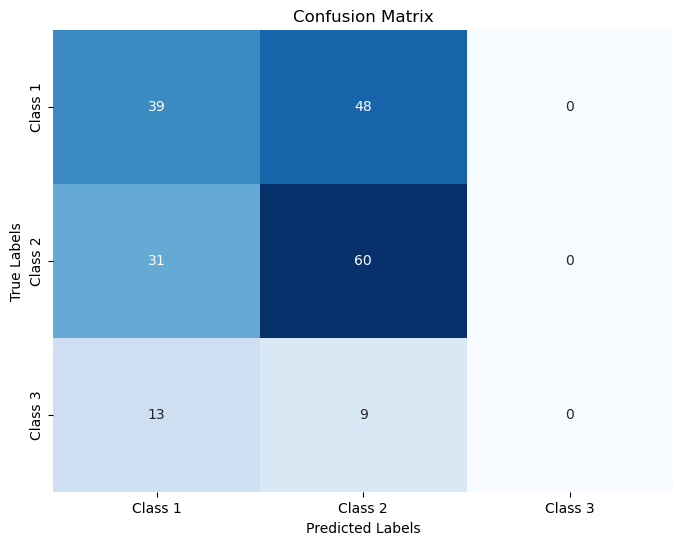

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [278]:
from keras.models import Sequential
from keras import models
from keras import layers

# Start creating neural network
network = models.Sequential()

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu", input_shape = (7,)))

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu"))

# Added fully connected layer that uses sigmoid function as activation function
network.add(layers.Dense(units = 1, activation = "sigmoid"))

#Compile neural network
network . compile ( loss = "binary_crossentropy" , # cross entropy
                optimizer = "rmsprop" ,   # root mean square propagation method
                metrics = [ "accuracy" ]) # performance indicators は accuracy

In [279]:
# pip install ucimlrepo

In [280]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [281]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month                1000 non-null   object  
 1   Freight Dublin       1000 non-null   float64 
 2   Passengers Dublin    1000 non-null   float64 
 3   Freight Helsinki     1000 non-null   float64 
 4   Passengers Helsinki  1000 non-null   float64 
 5   Ireland Index        1000 non-null   float64 
 6   Finland Index        1000 non-null   float64 
 7   Class                1000 non-null   category
dtypes: category(1), float64(6), object(1)
memory usage: 55.9+ KB


In [284]:
from sklearn import preprocessing

# select all categorical variables
synthetic_data_categorical = synthetic_data.select_dtypes(include=['category'])
synthetic_data_categorical.head()

,Class
0,Low
1,Low
2,Low
3,High
4,High


In [285]:
# Apply Label encoder to synthetic_data_categorical

label_encoder = preprocessing.LabelEncoder()
synthetic_data_categorical = synthetic_data_categorical.apply(label_encoder.fit_transform)
synthetic_data_categorical.head()

,Class
0,1
1,1
2,1
3,0
4,0


In [286]:
# concat synthetic_data_categorical with original synthetic_data
synthetic_data = synthetic_data.drop(synthetic_data_categorical.columns, axis=1)
synthetic_data = pd.concat([synthetic_data, synthetic_data_categorical], axis=1)
synthetic_data.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index,Class
0,2020M10,0.234012,0.494358,0.457730,0.515457,0.516551,0.403583,1
1,2021M10,0.241521,0.662200,0.555283,0.395985,0.599521,0.807084,1
2,2020M03,0.278061,0.636981,0.681633,0.715835,0.372547,0.584358,1
3,2020M10,0.503653,0.736423,0.739074,0.480797,0.316011,0.514954,0
4,2020M07,0.599574,0.741417,0.421175,0.447496,0.382516,0.527795,0


In [291]:
#data standardization  to transform the numeric variables so that each variable has zero mean and unit variance.
from sklearn import preprocessing
# Extract numeric columns only
numeric_columns = synthetic_data.select_dtypes(include='number')

# Scale numeric columns
synthetic_data_scaled = preprocessing.scale(numeric_columns)

numeric_columns = synthetic_data.select_dtypes(include='number')


In [292]:
# Create a DataFrame with the scaled data and the corresponding columns
synthetic_data_scaled = pd.DataFrame(synthetic_data_scaled, columns=numeric_columns.columns)

In [293]:
synthetic_data_scaled['Class'] = synthetic_data['Class']
synthetic_data = synthetic_data_scaled

synthetic_data.head()

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index,Class
0,-1.591505,-0.005598,-0.595960,-0.099802,0.598551,-0.902345,1
1,-1.550049,1.186492,0.118078,-0.908248,1.253489,1.996856,1
2,-1.348325,1.007377,1.042893,1.256119,-0.538164,0.396546,1
3,-0.102908,1.713660,1.463333,-0.334343,-0.984438,-0.102126,0
4,0.426640,1.749131,-0.863520,-0.559681,-0.459470,-0.009864,0


In [294]:
from sklearn.model_selection import train_test_split
X = synthetic_data.loc[:, synthetic_data.columns != 'Class']
y = synthetic_data.loc[:, 'Class']

# Display the scaled data for independent columms
X

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
0,-1.591505,-0.005598,-0.595960,-0.099802,0.598551,-0.902345
1,-1.550049,1.186492,0.118078,-0.908248,1.253489,1.996856
2,-1.348325,1.007377,1.042893,1.256119,-0.538164,0.396546
3,-0.102908,1.713660,1.463333,-0.334343,-0.984438,-0.102126
4,0.426640,1.749131,-0.863520,-0.559681,-0.459470,-0.009864
...,...,...,...,...,...,...
995,0.501078,-0.479186,1.067371,-0.373488,0.748289,1.332520
996,0.893257,-0.240290,1.220515,-0.616417,-0.854139,0.010884
997,0.590579,2.179552,0.243226,-0.138570,0.878708,0.217092
998,0.193392,-0.297393,-0.455677,0.432228,0.150623,-1.118104


In [295]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [296]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [301]:
# Fixing a random seed ensures reproducible results

import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [335]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(6,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Train the model
network.fit(X_train_reshaped, y_train, epochs=200)

Epoch 1/200


25/25 [==============================] - 1s 2ms/step - loss: 0.6789 - accuracy: 0.4800
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.5387
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6087
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.6700
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7163
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7538
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.7925
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8087
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8275
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.8275
Epoch 1